In [249]:
import pandas as pd
import numpy as np

#import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = {0: 'indianred', 1: 'steelblue',2: 'seagreen'}

#load the dataset "final_dataset_Nov_9.csv"
df = pd.read_csv("../Data/final_dataset_Nov_12.csv")

df

,STUDENT,GRAD_SEM,101,104,105,140,143,145,150,151,...,365,373,385,397,414,415,435,436,497,y
0,0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0.0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,7.0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,13059,4.0,0,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9175,13060,10.0,0,0,0,-1,0,0,-2,0,...,0,0,0,0,0,0,0,0,0,0
9176,13061,0.0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9177,13062,5.0,0,0,0,0,0,0,-4,0,...,0,0,0,0,0,0,0,0,0,1


In [250]:
df['GRAD_SEM'].value_counts()

GRAD_SEM
8.0     3315
0.0     2462
9.0      788
7.0      690
10.0     687
6.0      588
5.0      191
11.0     174
4.0      169
12.0     115
Name: count, dtype: int64

[]

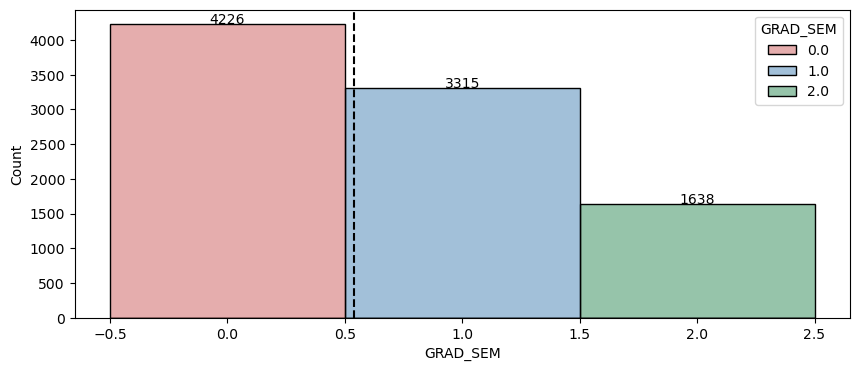

In [251]:
grad_rate = df['y'].mean()
#replace GRAD_SEM values of 0,10,11,12 with 9
df['GRAD_SEM'] = df['GRAD_SEM'].replace([0,10,11,12], 9)

#replace GRAD_SEM values < 8 with 7
df['GRAD_SEM'] = df['GRAD_SEM'].replace([4,5,6,7], 7)

#replace GRAD_SEM values with 9- GRAD_SEM
df['GRAD_SEM'] = 9 - df['GRAD_SEM']

#visualize the distribution of GRAD_SEM with a histogram
#make a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=df,
             x='GRAD_SEM',
             element='bars',
             hue='GRAD_SEM',
             palette=palette,
             discrete=True,
             stat='count')

# Display the bin counts, excluding the lower limit of 0
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 5), 
                    ha='center', va='baseline')
        
#draw a vertical line at the mean
ax.axvline(grad_rate, color='black', linestyle='--')
plt.plot()

In [252]:
gen_course_dict={   
    '104': 'INTRO TO PROBABILTY',
    "105": "INTRO TO MATH IDEA",
    "140": "COLLEGE ALGEBRA",
    "143": "PREP FOR CALCULUS",
    "145": "APPLD TRIGONOMETR",
    "150": "DISC MATH BUS&SOC S",
    "151": "BUS & SOC SCI CALC",
    "160": "SURVEY OF CALCULUS",
    "165": "CALCULUS I",
    "166": "CALCULUS II",
    "207": "MATRCES&LINEAR ALGB",
    "265": "CALCULUS III",
    "266": "ELEM DIFF EQUATNS",
    "267": "DIFF EQ & TRANSFMS"
    }

math_course_dict = {
    "101": "ORIENTATION IN MATH",
    "201": "INTRO TO PROOFS",
    "240": "INVESTM&CREDIT MATH",
    "301": "ABSTRACT ALGEBRA I",
    "302": "ABSTRCT ALGEBRA II",
    "304": "COMBINATORICS",
    "314": "GRAPH THEORY",
    "317": 'THRY LINEAR ALGEBRA',
    "350": "NUMBER THEORY",
    '341': 'INTR THY PROBAB&S I',
    '342': 'INTR THY PR&STAT II',
    "365": "COMPLEX VARIABLES",
    "373": "INTR SCIENTF CMPTNG",
    "385": "INTR PART DIFF EQUA",
    "397": "IV MATH TCH SECDY",
    "414": "ANALYSIS I",
    "415": "ANALYSIS II",
    "435": "GEOMETRY I",
    "436": "GEOMETRY II",
    "497": "TEACH SEC SCHL MATH"
    }

gen_prereqs = {'143':['140'],
               '160':['145'],
               '165':['143','140'],
               '166':['165','143','140'],
               '207':['165','143','140'],
               '265':['166','165','143','140'],
               '266':['265','166','165','143','140'],
               '267':['265','166','165','143','140']
               }

math_prereqs = {'304':['201'],
                '314':['201'],
                '317':['201'],
                '350':['201'],
                '414':['201'],
                '435':['201'],
                '436':['201'],
                '301':['317','201'],
                '407':['317','201'],
                '415':['414','201'],
                '302':['301','317','201'],
                '397':['301','317','201']
                }

gen_courses = list(gen_course_dict.keys())
math_courses = list(math_course_dict.keys())
courses = gen_courses + math_courses
courses.sort()

#diplay the general and math courses
print(f'General Courses: {gen_courses}')
print(f'Math Courses: {math_courses}')

General Courses: ['104', '105', '140', '143', '145', '150', '151', '160', '165', '166', '207', '265', '266', '267']
Math Courses: ['101', '201', '240', '301', '302', '304', '314', '317', '350', '341', '342', '365', '373', '385', '397', '414', '415', '435', '436', '497']


In [253]:
#for any general course not appearing as a key in gen_prereqs, add it with an empty list as the value; do the same for math courses and the math_prereqs dictionary
for course in gen_courses:
    if course not in gen_prereqs.keys():
        gen_prereqs[course] = []
for course in math_courses:
    if course not in math_prereqs.keys():
        math_prereqs[course] = []
#sort the prereq dictionaries by keys
gen_prereqs = dict(sorted(gen_prereqs.items()))
math_prereqs = dict(sorted(math_prereqs.items()))
math_prereqs

{'101': [],
 '201': [],
 '240': [],
 '301': ['317', '201'],
 '302': ['301', '317', '201'],
 '304': ['201'],
 '314': ['201'],
 '317': ['201'],
 '341': [],
 '342': [],
 '350': ['201'],
 '365': [],
 '373': [],
 '385': [],
 '397': ['301', '317', '201'],
 '407': ['317', '201'],
 '414': ['201'],
 '415': ['414', '201'],
 '435': ['201'],
 '436': ['201'],
 '497': []}

In [254]:
#loop through the semesters
for i in range(1, 9):
    # Create a new column for the semester
    df[f'SEM_{i}'] = df[courses].apply(lambda x: x.tolist().count(i) - x.tolist().count(-i), axis=1)

# Create cumulative sum columns for each semester. This will give us the total number of courses passed by the student up to that semester. In particular, the final column will give us the total number of courses passed by the student within 8 semesters.
df[[f'SEM_{i}_cumulative' for i in range(1, 9)]] = df[[f'SEM_{i}' for i in range(1, 9)]].cumsum(axis=1)

#for each student, calculate a line of best fit for the pairs (i, SEM_i_cumulative) for i = 1, 2, ..., 8
# Create new columns to store the slope and intercept of the line of best fit
df['slope'] = np.nan
df['intercept'] = np.nan

# Loop through the rows of the DataFrame
for i, row in df.iterrows():
    # Extract the x and y values
    x = np.array(range(1, 9))
    y = row[[f'SEM_{i}_cumulative' for i in range(1, 9)]]
    
    # Calculate the slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    
    # Store the values in the DataFrame
    df.at[i, 'slope'] = slope
    df.at[i, 'intercept'] = intercept

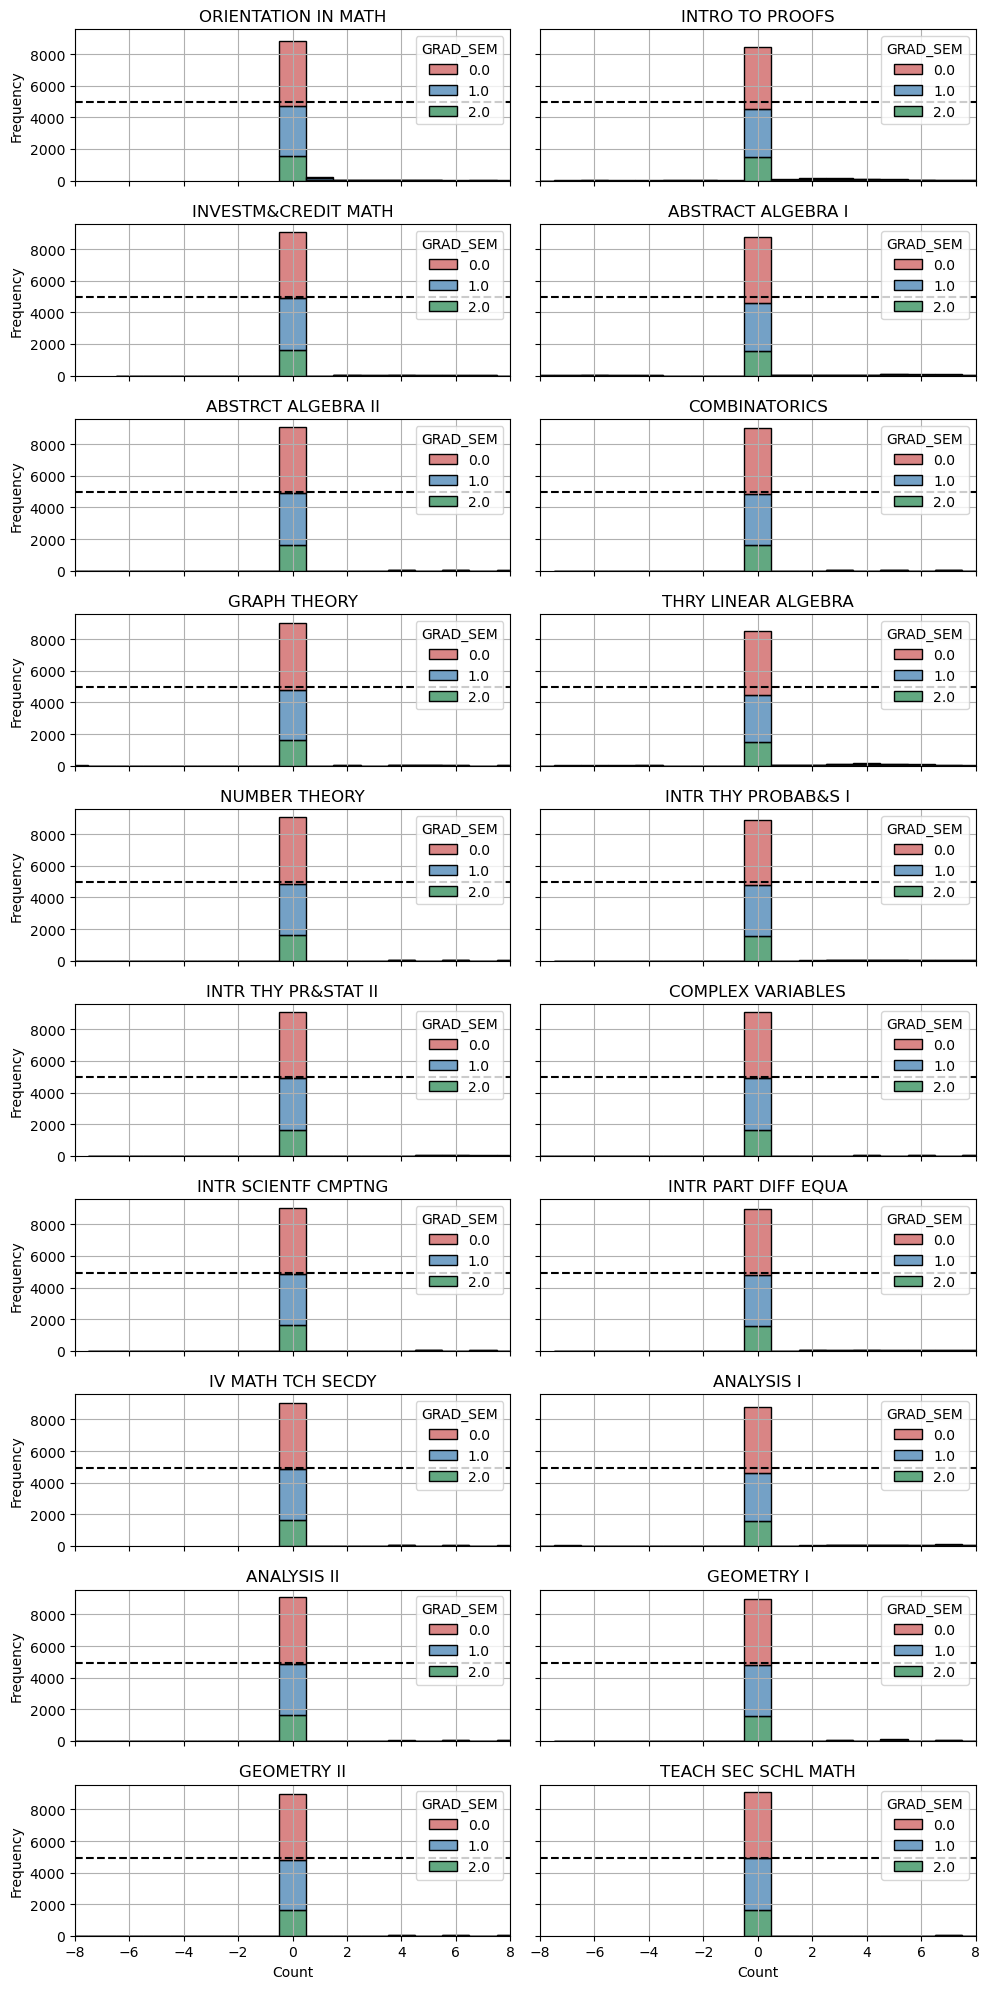

In [309]:
#visualize the distribution of the math courses in subplots. include the count in each bin of the histplot

fig, ax = plt.subplots(10,2, figsize=(10,20),sharex=True, sharey=True)
ax = ax.flatten()
for i, course in enumerate(math_courses):
    sns.histplot(df, 
                 x=course, 
                 ax=ax[i], 
                 hue='GRAD_SEM', 
                 palette=palette, 
                 element='bars', 
                 multiple='stack',
                 discrete=True)
    # for p in ax[i].patches:
    #     if p.get_height() > 0:
    #         ax[i].annotate(f'{int(p.get_height())}', 
    #                        (p.get_x() + p.get_width() / 2., p.get_height() + 5), 
    #                        ha='center', va='baseline')
    #draw a horizontal line at the number of students in the dataset who have y=1
    ax[i].axhline(df['y'].sum(), color='black', linestyle='--')
    ax[i].set_title(f'{math_course_dict[course]}')
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlim(-8,8)
    ax[i].grid(True)
plt.tight_layout()
plt.show()

In [320]:
#create a dataframe whose index is the math courses and the columns are -8, -7, ..., 7, 8. The value in the (i, j) entry of the DataFrame should be the number of students who took course i in semester j.
math_semester_counts = pd.DataFrame(index=math_courses, columns=range(-8, 9))
for course in math_courses:
    for i in range(-8, 9):
        math_semester_counts.at[course, i] = df[df[course] == i].shape[0]

math_semester_counts['non-zero'] = len(df) - math_semester_counts[0]
math_semester_counts.sort_values('non-zero', ascending=False, inplace=True)

#do the same for the general courses
gen_semester_counts = pd.DataFrame(index=gen_courses, columns=range(-8, 9))
for course in gen_courses:
    for i in range(-8, 9):
        gen_semester_counts.at[course, i] = df[df[course] == i].shape[0]

gen_semester_counts['non-zero'] = len(df) - gen_semester_counts[0]
gen_semester_counts.sort_values('non-zero', ascending=False, inplace=True)

In [321]:
math_semester_counts

,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,non-zero
201,1,2,3,7,8,10,13,2,8484,70,141,174,119,69,35,19,22,695
317,5,6,8,9,22,5,3,2,8550,18,60,95,156,104,91,28,17,629
301,3,12,8,21,3,2,2,1,8756,8,11,38,62,94,67,69,22,423
414,8,19,11,8,2,2,1,0,8762,5,14,25,46,72,74,75,55,417
101,0,0,0,0,0,0,0,0,8849,237,16,39,3,23,2,8,2,330
341,0,2,0,4,1,0,0,0,8919,3,8,21,44,61,49,31,36,260
385,0,2,2,3,5,0,1,1,8963,5,21,28,48,35,27,19,19,216
435,0,10,0,1,0,0,0,0,8990,1,2,14,7,78,6,67,3,189
436,6,0,0,0,1,0,0,0,9011,0,2,2,20,6,70,3,58,168
314,6,0,4,0,2,0,1,0,9021,0,11,1,37,7,40,2,47,158


In [322]:
gen_semester_counts

,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,non-zero
165,6,5,15,11,30,47,139,142,6597,1173,677,102,125,33,42,10,25,2582
166,7,5,16,22,58,83,131,31,7036,409,834,283,139,57,38,16,14,2143
265,4,6,16,26,50,64,27,23,7621,229,347,402,189,74,56,29,16,1558
143,0,2,4,7,6,22,73,174,7651,832,263,66,37,22,13,2,5,1528
140,14,8,11,6,21,25,41,69,7900,410,225,104,123,62,84,36,40,1279
104,6,10,18,16,16,45,43,18,8002,147,233,185,156,89,99,39,57,1177
150,11,9,9,16,18,37,41,39,8112,235,261,119,102,74,43,24,29,1067
207,10,14,19,23,22,20,8,13,8307,74,70,148,153,102,98,63,35,872
267,1,1,8,7,25,11,10,5,8554,51,108,164,153,40,21,11,9,625
105,2,9,7,4,14,13,21,23,8668,145,102,39,45,24,29,18,16,511


,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,non-zero
201,1,2,3,7,8,10,13,2,8484,70,141,174,119,69,35,19,22,695
317,5,6,8,9,22,5,3,2,8550,18,60,95,156,104,91,28,17,629
301,3,12,8,21,3,2,2,1,8756,8,11,38,62,94,67,69,22,423
414,8,19,11,8,2,2,1,0,8762,5,14,25,46,72,74,75,55,417
101,0,0,0,0,0,0,0,0,8849,237,16,39,3,23,2,8,2,330
341,0,2,0,4,1,0,0,0,8919,3,8,21,44,61,49,31,36,260
385,0,2,2,3,5,0,1,1,8963,5,21,28,48,35,27,19,19,216
435,0,10,0,1,0,0,0,0,8990,1,2,14,7,78,6,67,3,189
436,6,0,0,0,1,0,0,0,9011,0,2,2,20,6,70,3,58,168
314,6,0,4,0,2,0,1,0,9021,0,11,1,37,7,40,2,47,158


In [ ]:
{'101': [],
 '201': [],
 '240': [],
 '301': ['317', '201'],
 '302': ['301', '317', '201'],
 '304': ['201'],
 '314': ['201'],
 '317': ['201'],
 '341': [],
 '342': [],
 '350': ['201'],
 '365': [],
 '373': [],
 '385': [],
 '397': ['301', '317', '201'],
 '407': ['317', '201'],
 '414': ['201'],
 '415': ['414', '201'],
 '435': ['201'],
 '436': ['201'],
 '497': []}

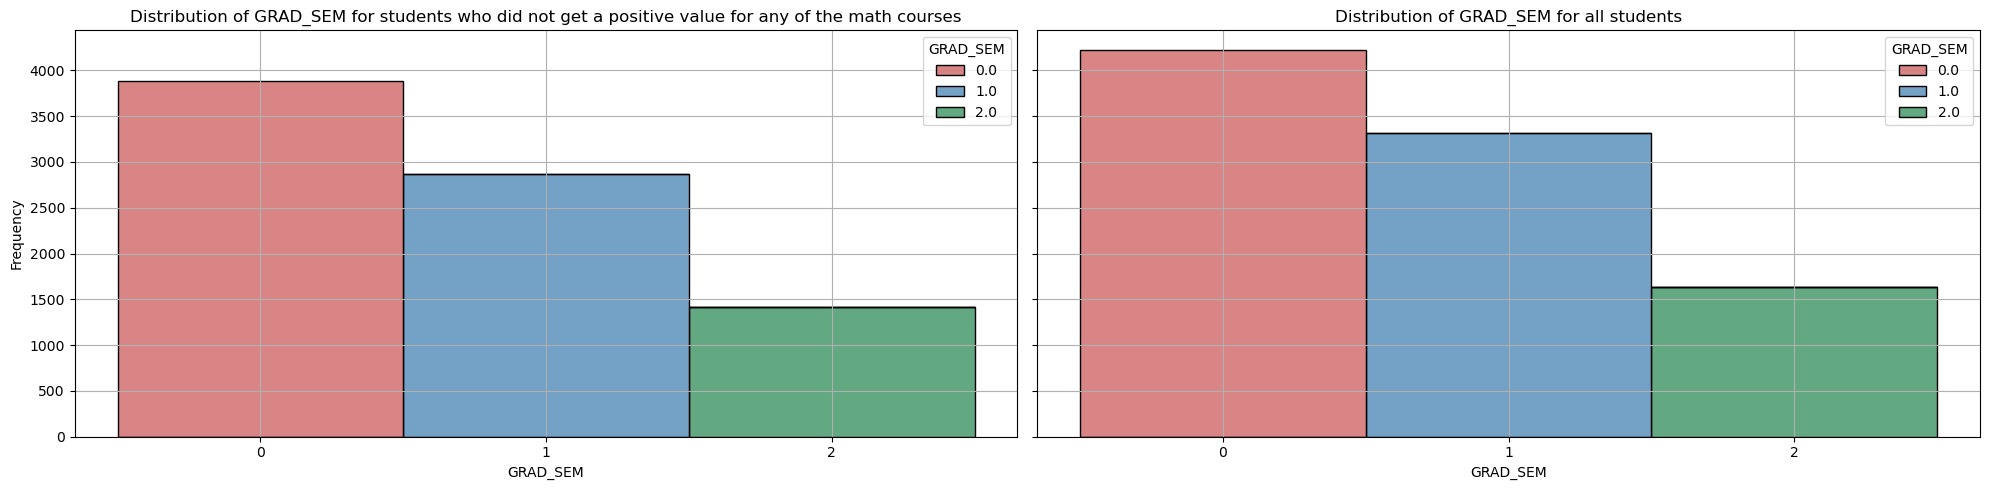

In [259]:
#visualize the distribution of GRAD_SEM given that the student did not get a positive value for any of of the courses in math_courses. Include the count in each bin of the histplot

#make a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 5),sharey=True)

#plot the histogram for students who did not get a positive value for any of the math courses
sns.histplot(data=df[df[math_courses].sum(axis=1) <= 0], 
             x='GRAD_SEM',
             hue='GRAD_SEM',
             multiple='stack',
             palette=palette, 
             ax=axs[0],
             discrete=True)
axs[0].set_title('Distribution of GRAD_SEM for students who did not get a positive value for any of the math courses')  
axs[0].set_xlabel('GRAD_SEM')
axs[0].set_xticks([0, 1, 2])
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

#plot the histogram for all students
sns.histplot(data=df, 
             x='GRAD_SEM',
             hue='GRAD_SEM',
             multiple='stack',
             palette=palette, 
             ax=axs[1],
             discrete=True)
axs[1].set_title('Distribution of GRAD_SEM for all students')  
axs[1].set_xlabel('GRAD_SEM')
axs[1].set_xticks([0, 1, 2])
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [292]:
df_neg_math = df[df[math_courses].sum(axis=1) <= 0]
df_pos_math = df[df[math_courses].sum(axis=1) > 0]

df_yes_math = df[df[math_courses].gt(0).any(axis=1)]
df_no_math = df[df[math_courses].le(0).all(axis=1)]

In [294]:
print('Students with net negative math performance:', len(df_neg_math))
print('Students with net positive math performance:', len(df_pos_math))
print('Students that did not pass any math courses:', len(df_no_math))
print('Students that passed at least one math course:', len(df_yes_math))

Students with net negative math performance: 8173
Students with net positive math performance: 1006
Students that did not pass any math courses: 8131
Students that passed at least one math course: 1048


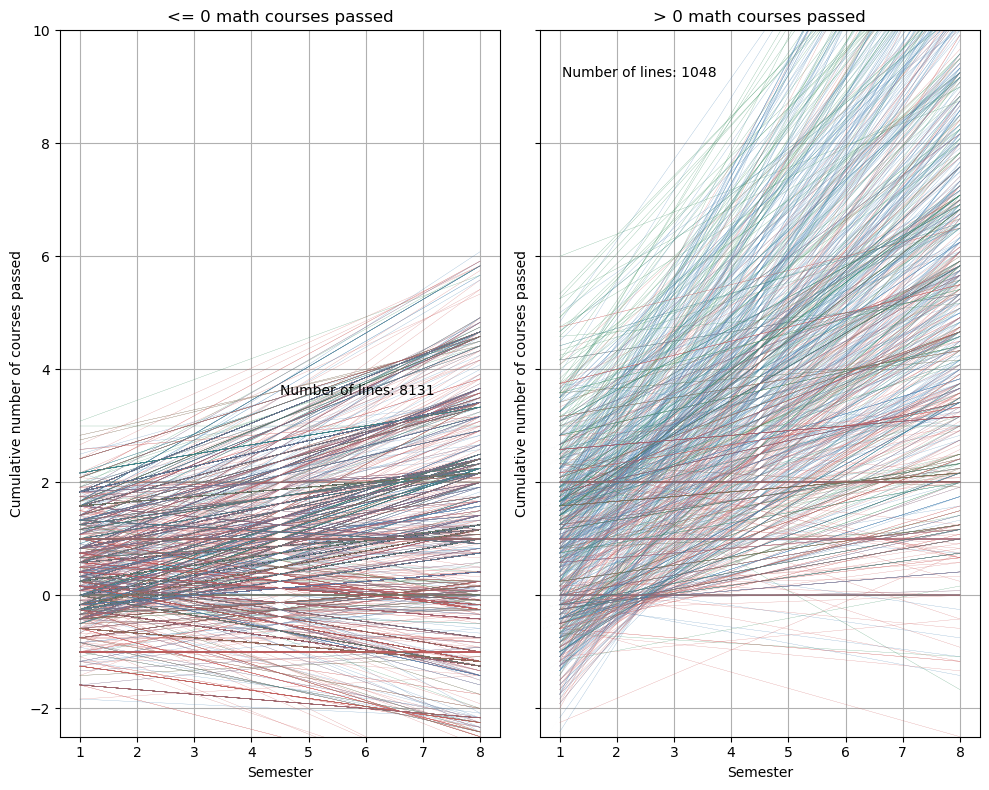

In [ ]:
#visualize the lines of best fit for the students in df_no_math and df_yes_math, respectively. Put these in separate subplots. Color the lines using the palette with the GRAD_SEM values as the hue. 

#make a figure and axes
fig, axs = plt.subplots(1,2, figsize=(10, 8),sharey=True)

#plot the lines of best fit for the students in df_no_math
for i, row in df_no_math.iterrows():
    x = np.array(range(1, 9))
    slope = row['slope']
    intercept = row['intercept']
    axs[0].plot(x, 
                slope * x + intercept, 
                color=palette[row['GRAD_SEM']], 
                alpha=0.7,
                linewidth=0.2)
axs[0].set_title('<= 0 math courses passed')
#display the number of lines on the plot
axs[0].text(0.5, 0.5, f'Number of lines: {len(df_no_math)}', 
            horizontalalignment='left', 
            verticalalignment='top',
            transform=axs[0].transAxes)
axs[0].set_ylim([-2.5,10])
axs[0].set_xlabel('Semester')
axs[0].set_ylabel('Cumulative number of courses passed')
axs[0].grid(True)

#plot the lines of best fit for the students in df_yes_math
for i, row in df_yes_math.iterrows():
    x = np.array(range(1, 9))
    slope = row['slope']
    intercept = row['intercept']
    axs[1].plot(x, 
                slope * x + intercept, 
                color=palette[row['GRAD_SEM']], 
                alpha=0.7,
                linewidth=0.2)
axs[1].set_title('> 0 math courses passed')
#display the number of lines on the plot
axs[1].text(0.05, 0.95, f'Number of lines: {len(df_yes_math)}', 
            horizontalalignment='left', 
            verticalalignment='top',
            transform=axs[1].transAxes)
axs[1].set_ylim([-2.5,10])
axs[1].set_xlabel('Semester')
axs[1].set_ylabel('Cumulative number of courses passed')
axs[1].grid(True)
plt.tight_layout()
plt.show()